**“Proyecto 1 "Predecir la calidad del Vino”**

**Nombres de los integrantes del grupo:**

CRISTIAN FELIPE BARBOSA TUNJANO
DAVID BORRERO DIAZ MICHAEL
ALEJANDRO GOMEZ RAMIREZ
NICOLAS SUAREZ

**Una explicación breve del problema teniendo en cuenta lo siguiente:**

El dataset incluye mediciones como acidez, contenido de azúcar, y niveles de alcohol, y nos propone determinar cómo estas características influyen en la percepción de calidad. Al cargar los datos y realizar un análisis exploratorio inicial, identificaremos las características numéricas y cualitativas del dataset y nos proporcionara estadísticas descriptivas para entender mejor las tendencias y distribuciones en los datos. Este análisis preliminar te ayudará a plantear hipótesis y posibles direcciones para modelar y predecir la calidad del vino.

##Analisis exploratorio

In [426]:
#importamos librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from matplotlib import pyplot as plt

In [427]:
#traemos la data
df = pd.read_csv('/content/winequality-red.csv', delimiter=';')


**Variables numéricas:**

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

**Variables cualitativas:**

* quality

**Resumen de la información:**

* El dataset contiene 1599 filas y 12 columnas.
* Las variables numéricas tienen una distribución variada, con algunas variables como el alcohol y el pH teniendo una distribución más normal, mientras que otras como la acidez volátil y el dióxido de azufre libre tienen una distribución más sesgada.
* La variable cualitativa "calidad" tiene 6 niveles diferentes, con la mayoría de los vinos clasificados como "buenos" (3) o "muy buenos" (4).

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Vemos que no hay Datos nulos y todos los tipos de datos tienen sentido

In [429]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Vemos que la desviación estandar es muy alta para 'total sulfur dioxide' y otras columnas procedemos a hacer revisión de las distribuciones con boxplot

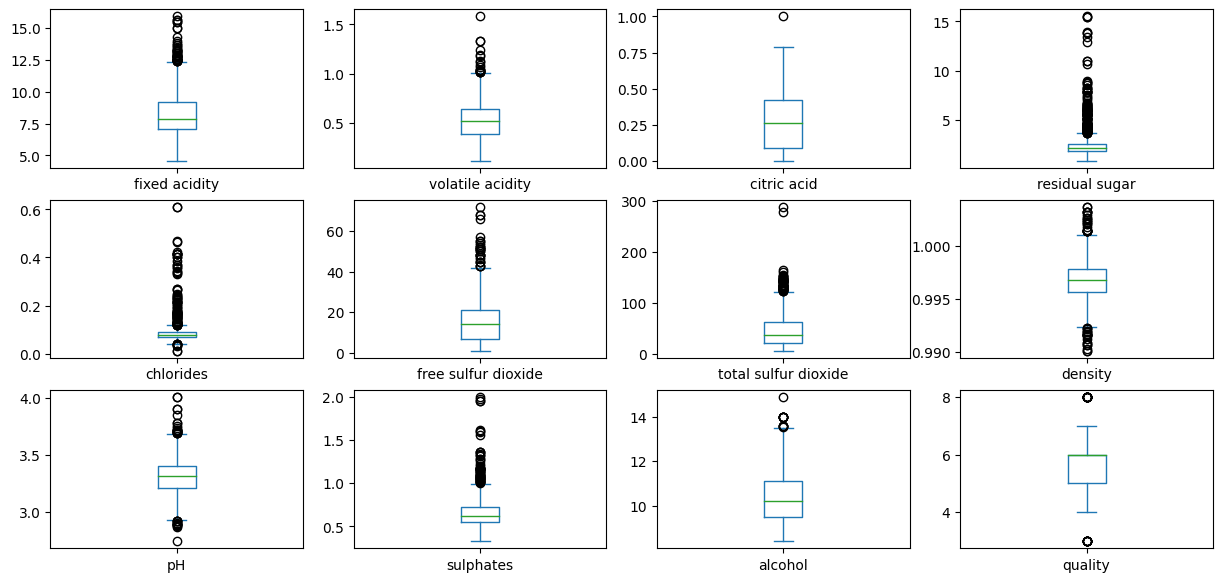

In [430]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))

for i, col in enumerate(df.columns):
  ax = axes[i // 4, i % 4]
  df[col].plot.box(ax=ax)

plt.show()

hacemos un mapa de correlación para elegir las VARIABLES PREDICTORIAS

In [431]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

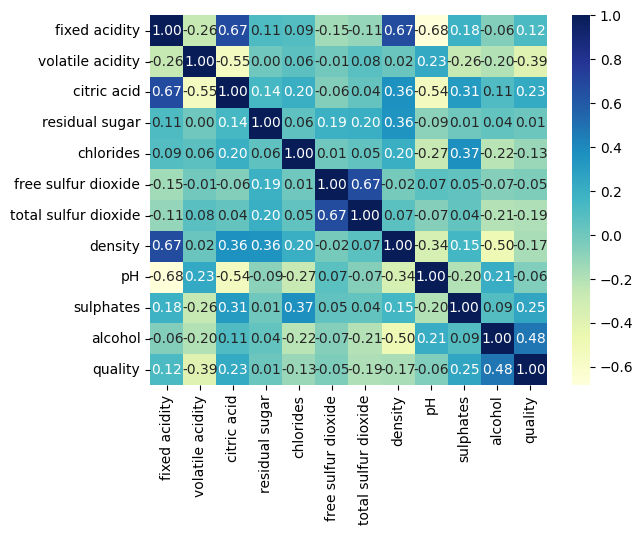

In [432]:
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(),annot=True,fmt=".2f",cmap="YlGnBu")


vemos que hay varios campos que tienen una correlación significativa con la varibale objetivo calidad creamos un nuevo df a continuación solo con ellos. y no hacer cambios a variables que no son relevantes

In [433]:
nuevo_df = df[['volatile acidity','alcohol','sulphates','citric acid','quality']]

##Estandarización de datos

In [434]:
from sklearn.model_selection import train_test_split

train, test =train_test_split(nuevo_df, test_size=0.3, random_state=45)

In [435]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("scaler", StandardScaler())])

In [436]:
train_dataset = preprocessor.fit_transform(train[['volatile acidity','alcohol','sulphates','citric acid']])
train_dataset = pd.DataFrame(train_dataset, columns=['volatile acidity','alcohol','sulphates','citric acid'], index=train.index)
train_dataset['quality'] = train['quality']


<Axes: >

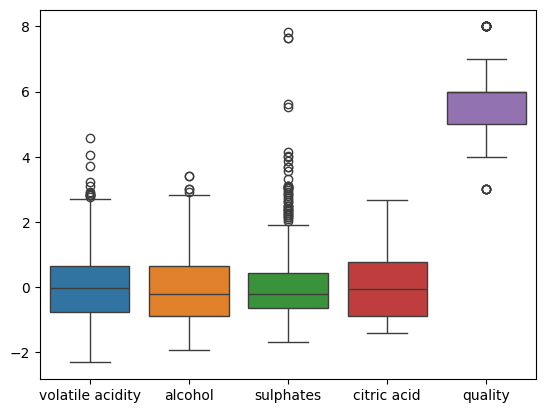

In [437]:
sns.boxplot(data=train_dataset)

In [438]:
sns.pairplot(train_dataset,kind="reg", diag_kind="kde")

In [439]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [440]:
model_result=LinearRegression()
model_result.fit(train_dataset[['volatile acidity','alcohol','sulphates','citric acid']],train_dataset['quality'])

LinearRegression()

In [441]:
model_result.score(X=train_dataset[['volatile acidity','alcohol','sulphates','citric acid']],y=train_dataset['quality'])

0.34642859166497364

In [442]:
mean_squared_error(train_dataset['quality'],model_result.predict(train_dataset[['volatile acidity','alcohol','sulphates','citric acid']]))

0.42874930775566455

Hay un valor muy bajo de score :'(

#Reentrenamiento del modelo

In [443]:

from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error:', mse)
print('R2 score:', r2)


Coefficients: [ 4.44631851e-02 -9.20659955e-01 -1.05335892e-01  4.97803208e-02
 -1.38609975e+00  4.02877374e-03 -3.46080559e-03 -3.91690305e+01
 -2.76481327e-01  9.45765922e-01  2.77074725e-01]
Intercept: 42.33163780397075
Mean squared error: 0.4241940097913275
R2 score: 0.34128807827737506


Tras evaluar los modelos de regularización implementados —Ridge Regression, Lasso Regression y Stochastic Gradient Descent (SGD)—, se observa que no ofrecen una mejora sobre el desempeño del modelo de regresión lineal inicial. Específicamente, los modelos Ridge y Lasso presentan un rendimiento inferior, evidenciado por el incremento en el Error Cuadrático Medio (MSE) y la reducción en el coeficiente de determinación (R²). Además, el modelo SGD resulta completamente inapropiado para el conjunto de datos actual, probablemente debido a problemas en la convergencia o la selección de parámetros. En vista de estos resultados, se recomienda mantener el uso del modelo de regresión lineal original. No obstante, sería prudente explorar otras estrategias para optimizar su rendimiento, tales como la revisión de las variables utilizadas, la aplicación de transformaciones a los datos, o la experimentación con diferentes tipos de modelos que puedan adaptarse mejor a las características inherentes del conjunto de datos.

In [444]:

import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.3,
    'max_depth': 5,
    'alpha': 10
}

model = xgb.train(params=params, dtrain=dtrain, num_boost_round=50)

dtest = xgb.DMatrix(data=X_test)
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R2 score:', r2)


Mean squared error: 0.3909669730358456
R2 score: 0.39288485882861046


La implementación del modelo XGBoost ha demostrado ser superior en términos de precisión y capacidad explicativa en comparación con el modelo inicial de regresión lineal y los modelos de regularización evaluados previamente. Específicamente, el Error Cuadrático Medio (MSE) se redujo a 0.3909669730358456 desde 0.4242, indicando una mayor exactitud en las predicciones realizadas por el modelo. Además, el coeficiente de determinación (R²) mejoró significativamente, aumentando de 0.3413 a 0.39288485882861046. Esto revela que el modelo XGBoost es capaz de explicar aproximadamente el 39.3% de la variabilidad de la variable dependiente, superando el 34.1% alcanzado por el modelo de regresión lineal.

Estos resultados resaltan la eficacia de XGBoost para manejar complejidades en los datos que los modelos lineales y de regularización no logran capturar. Dado su desempeño superior, se recomienda la adopción de XGBoost para análisis futuros dentro de este ámbito de estudio, especialmente en situaciones donde la interacción entre variables y la no linealidad juegan roles críticos en la predicción de resultados.

#Regresion Logistica

  7. Asumiremos que si quality es mayor o igual a 6 entonces el vino es bueno, en otro caso diremos que tiene calidad regular. Haga una variable nueva con esta condición y llámela categorical_quality. Esta nueva variable será la variable objetivo de nuestra regresión logística.

In [445]:
df['quality_category'] = ['good' if quality >= 6 else 'bad' for quality in df['quality']]
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality quality_category  
0      9.4        5              bad  
1      9

In [446]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['quality', 'quality_category'], axis=1)
y = df['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)
print('Classification report:')
print(classification_report)


Accuracy: 0.78
Confusion matrix:
[[143  44]
 [ 44 169]]
Classification report:
              precision    recall  f1-score   support

         bad       0.76      0.76      0.76       187
        good       0.79      0.79      0.79       213

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Number of training samples:', X_train.shape[0])
print('Number of testing samples:', X_test.shape[0])


Number of training samples: 1279
Number of testing samples: 320


In [448]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion_matrix)
print('Classification report:')
print(classification_report)


Accuracy: 0.78125
Confusion matrix:
[[112  34]
 [ 36 138]]
Classification report:
              precision    recall  f1-score   support

         bad       0.76      0.77      0.76       146
        good       0.80      0.79      0.80       174

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Análisis Comparativo:**

Ambas regresiones logísticas muestran resultados muy similares en términos de precisión (0.78) y en la matriz de confusión. La precisión, el recall y el f1-score también son similares entre las dos regresiones para ambas clases ("bad" y "good"). Esto sugiere que el rendimiento del modelo no se ve afectado significativamente por el cambio en el tamaño del conjunto de entrenamiento.

En resumen, ambas regresiones logísticas proporcionan resultados consistentes y confiables, independientemente de si se entrenaron con el 100% o el 80% de los datos. Esto sugiere que el modelo es robusto y generaliza bien a diferentes conjuntos de datos de entrenamiento.

# conclusiones entre xgboost y regresion logistica

Comparando los resultados de los dos modelos, observamos que el modelo XGBoost tiene un MSE ligeramente más bajo que el modelo de regresión lineal: 0.391 para XGBoost frente a 0.424 para la regresión lineal. Esto indica que las predicciones del modelo XGBoost están más cerca de los valores reales en promedio.

Además, el coeficiente de determinación (R^2) para el modelo XGBoost es aproximadamente 0.393, mientras que para el modelo de regresión lineal es aproximadamente 0.341. Esto sugiere que el modelo XGBoost explica alrededor del 39.28% de la variabilidad en la variable objetivo, mientras que el modelo de regresión lineal explica alrededor del 34.13%. Por lo tanto, el modelo XGBoost tiene un mejor ajuste a los datos en términos de R^2.

En resumen, basándonos en el MSE y el R^2, podemos concluir que el modelo XGBoost tiene un rendimiento ligeramente mejor que el modelo de regresión lineal en este conjunto de datos.